<a href="https://colab.research.google.com/github/PiriPiri57/Local-repo/blob/main/Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Last working day: 2025-04-25
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


First rows of stock data:
Price        Date       Close        High         Low        Open      Volume
Ticker            RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS
0      1996-01-01    5.213401    5.222269    5.160190    5.194397   104121369
1      1996-01-02    5.172860    5.226071    5.134852    5.200733   168743308
2      1996-01-03    5.212134    5.497193    5.200732    5.257743   209323879
3      1996-01-04    5.163991    5.179195    5.094311    5.162725   216900264
4      1996-01-05    5.128517    5.143720    5.084175    5.143720   166708467


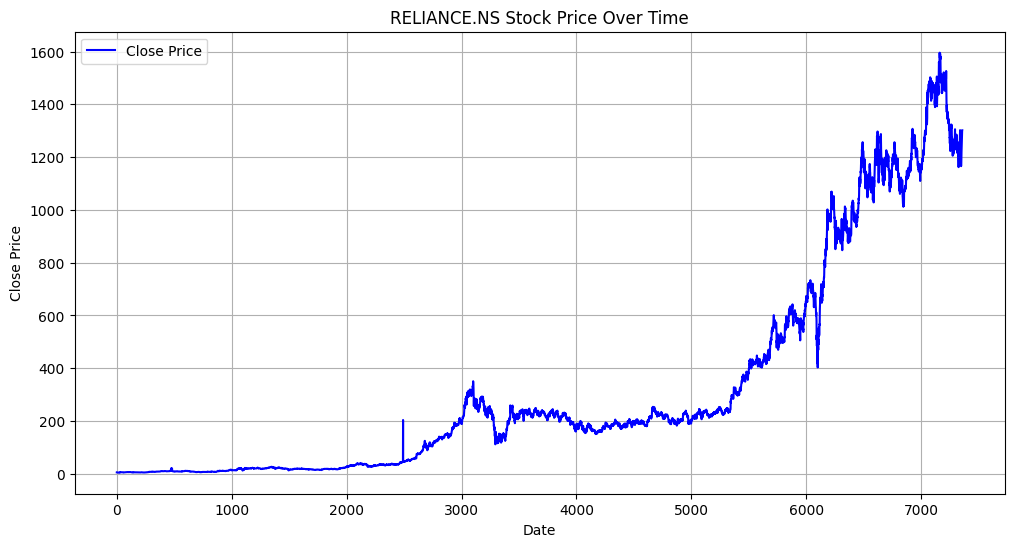

In [1]:
# Step 1: Install yfinance
!pip install yfinance --quiet
!pip install pandas_market_calendars --quiet

# Step 2: Import libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import datetime
import numpy as np
import pandas_market_calendars as mcal
drive.mount('/content/drive')

# Step 3: Choose your stock and time period
ticker = 'RELIANCE.NS'  # You can change this to any valid stock symbol
stock = yf.Ticker(ticker)
nse = mcal.get_calendar('NSE')

# Step 4: Download historical data
today = datetime.datetime.today()

# If today is Monday (0), we need Friday's date (today - 3 days)
# If today is Sunday (6), we need Friday's date (today - 2 days)
# If today is Saturday (5), we need Friday's date (today - 1 day)
# Otherwise (Tuesday to Friday), just take yesterday

start = today - datetime.timedelta(days=3650)
end = today

schedule = nse.schedule(start_date=start.strftime('%Y-%m-%d'), end_date=end.strftime('%Y-%m-%d'))
trading_days = schedule.index

# Find the last trading day before or equal to today
if today.date() in trading_days.date:
    last_working_day = today.date()
else:
    last_working_day = trading_days[trading_days < np.datetime64(today)].max().date()

print(f"Last working day: {last_working_day}")

# Step 2: Download data up to the LAST working day (INCLUDE it)
df = yf.download(ticker, end=(last_working_day + datetime.timedelta(days=1)).strftime('%Y-%m-%d'))
df.reset_index(inplace=True)
today_data=df.iloc[-1]
df=df.iloc[:-1]
# Save entire dataset
save_path = "/content/drive/My Drive/DS_Dataset_FinanceTrends.csv"
df.to_csv(save_path, index=True)

# Step 3: Save only last working day's row into another dataset (today_features)



# Step 5: Display first few rows
print("First rows of stock data:")
print(df.head())


# Step 6: Plot the Close price
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.title(f"{ticker} Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


In [2]:
df.isnull().sum()

,,0
Price,Ticker,
Date,,0
Close,RELIANCE.NS,0
High,RELIANCE.NS,0
Low,RELIANCE.NS,0
Open,RELIANCE.NS,0
Volume,RELIANCE.NS,0


In [3]:
df.tail()

Price,Date,Close,High,Low,Open,Volume
Ticker,,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
7353,2025-04-17,1274.500000,1280.199951,1227.599976,1240.199951,15398401
7354,2025-04-21,1295.500000,1300.900024,1267.000000,1270.000000,10429964
7355,2025-04-22,1291.199951,1303.900024,1286.300049,1300.000000,13051707
7356,2025-04-23,1300.000000,1306.000000,1285.400024,1297.000000,10480888
7357,2025-04-24,1301.599976,1304.500000,1290.300049,1292.400024,10468940


In [4]:
df.tail()

Price,Date,Close,High,Low,Open,Volume
Ticker,,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
7353,2025-04-17,1274.500000,1280.199951,1227.599976,1240.199951,15398401
7354,2025-04-21,1295.500000,1300.900024,1267.000000,1270.000000,10429964
7355,2025-04-22,1291.199951,1303.900024,1286.300049,1300.000000,13051707
7356,2025-04-23,1300.000000,1306.000000,1285.400024,1297.000000,10480888
7357,2025-04-24,1301.599976,1304.500000,1290.300049,1292.400024,10468940


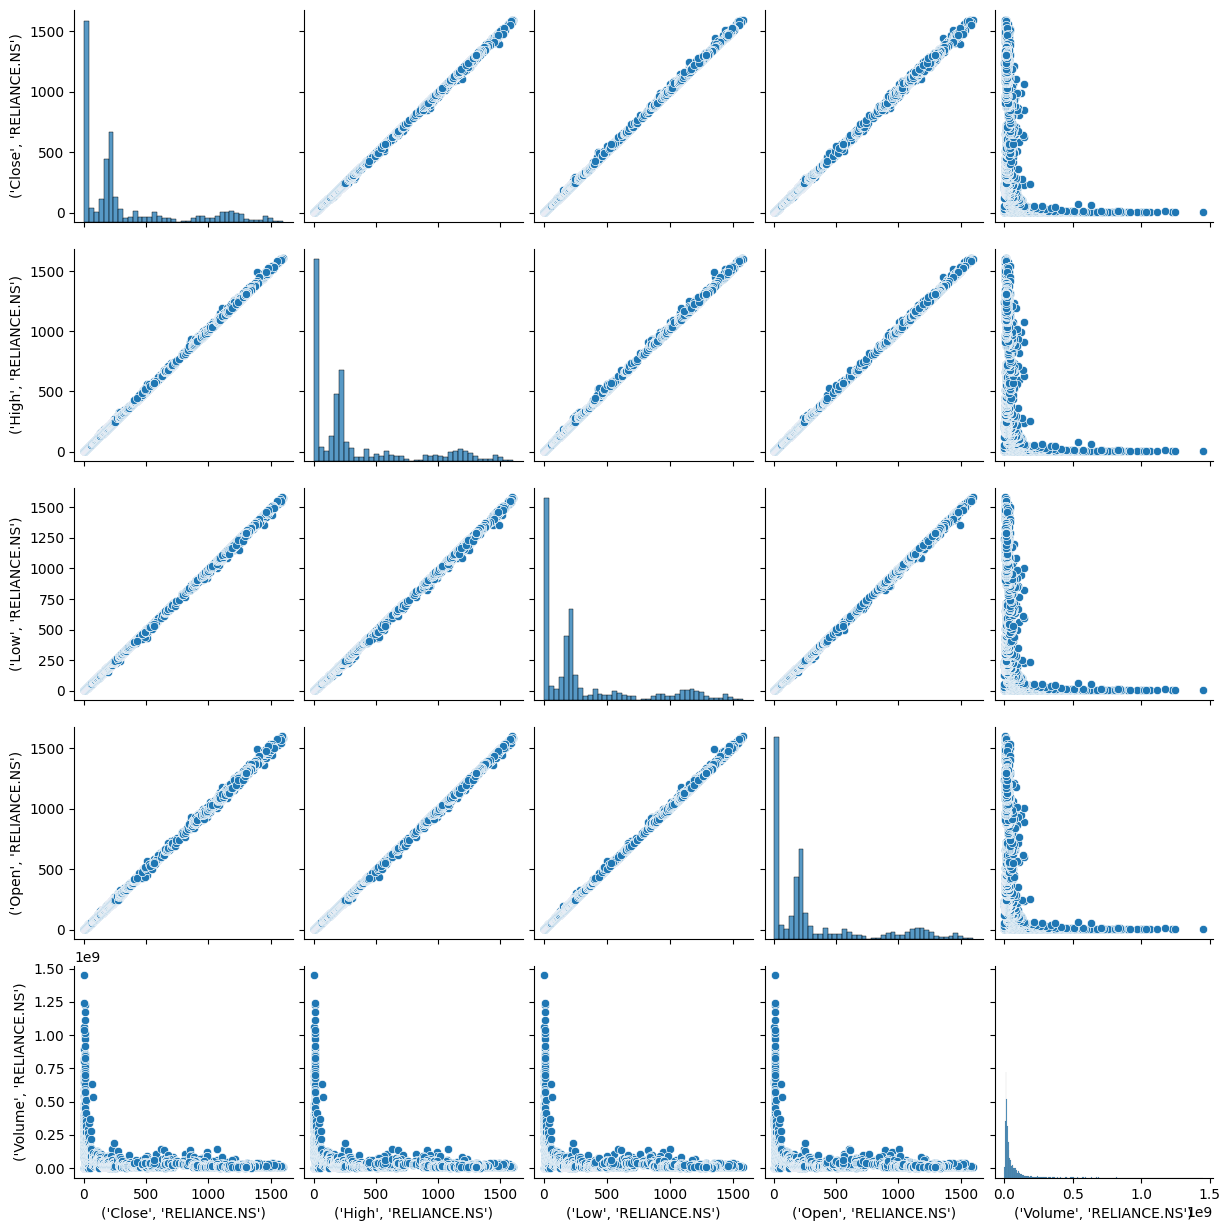

In [5]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)

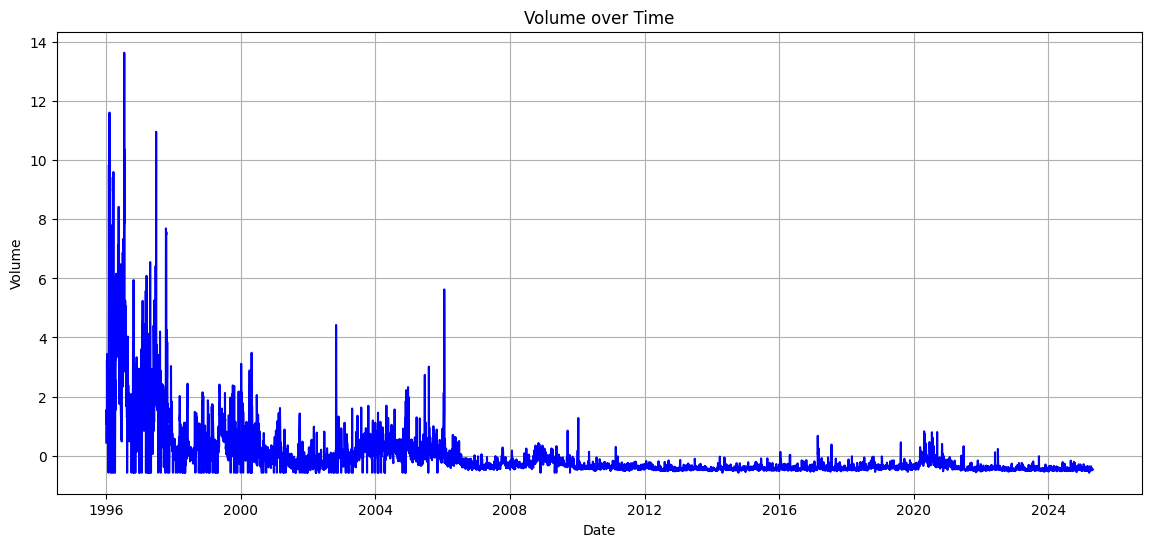

In [6]:
from sklearn.preprocessing import StandardScaler
df['Date'] = pd.to_datetime(df['Date'])
scaler = StandardScaler()
df['Volume_scaled'] = scaler.fit_transform(df[['Volume']])

plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Volume_scaled'], color='blue')
plt.title('Volume over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

In [7]:
df.drop(columns=['Dividends', 'Stock Splits'], inplace=True, errors='ignore') #Removing constant columns


df.head()

Price,Date,Close,High,Low,Open,Volume,Volume_scaled
Ticker,,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,
0,1996-01-01,5.213401,5.222269,5.160190,5.194397,104121369,0.441244
1,1996-01-02,5.172860,5.226071,5.134852,5.200733,168743308,1.075651
2,1996-01-03,5.212134,5.497193,5.200732,5.257743,209323879,1.474039
3,1996-01-04,5.163991,5.179195,5.094311,5.162725,216900264,1.548418
4,1996-01-05,5.128517,5.143720,5.084175,5.143720,166708467,1.055675


In [8]:
import numpy as np
# --- 1. Date Parts ---
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['IsMonthStart'] = df['Date'].dt.is_month_start.astype(int)
df['IsMonthEnd'] = df['Date'].dt.is_month_end.astype(int)

# --- 2. Lag Features ---
df['lag_1'] = df['Close'].shift(1)  # yesterday's close
df['lag_5'] = df['Close'].shift(5)  # close 5 days ago
df['lag_10'] = df['Close'].shift(10)

# --- 3. Rolling Means ---
df['rolling_mean_5'] = df['Close'].rolling(window=5).mean()
df['rolling_mean_10'] = df['Close'].rolling(window=10).mean()
df['rolling_mean_20'] = df['Close'].rolling(window=20).mean()


# --- 4. Returns ---
df['Daily_Return'] = df['Close'].pct_change()
df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))

df['Log_Volume'] = df['Volume'].shift(1)
df['Rolling_Volume'] = df['Volume'].rolling(3).mean()


# --- Drop NaNs caused by shift/rolling ---
df.dropna(inplace=True)

In [9]:
df.drop(columns=['Date'], inplace=True, errors='ignore')  #removing categorical columns, doesnt has any significant affect on data no point of encoding it
df.head()

<ipython-input-9-ab7492d5d9ae>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df.drop(columns=['Date'], inplace=True, errors='ignore')  #removing categorical columns, doesnt has any significant affect on data no point of encoding it


Price,Close,High,Low,Open,Volume,Volume_scaled,Year,Month,Day,DayOfWeek,...,lag_1,lag_5,lag_10,rolling_mean_5,rolling_mean_10,rolling_mean_20,Daily_Return,Log_Return,Log_Volume,Rolling_Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,,,,,,...,,,,,,,,,,
19,3.894530,3.894530,3.894530,3.894530,0,-0.580937,1996,1,26,4,...,3.894530,4.322752,4.753507,4.092171,4.312616,4.646895,0.000000,0.000000,3.608558e+08,2.373472e+08
20,4.201127,4.237868,3.852723,3.876794,652902286,5.828741,1996,1,29,0,...,3.894530,4.396234,4.704096,4.053150,4.262319,4.596281,0.078725,0.075780,0.000000e+00,3.379194e+08
21,4.578671,4.788981,4.269541,4.332887,1061936020,9.844311,1996,1,30,1,...,4.201127,4.209995,4.712965,4.126885,4.248890,4.566572,0.089867,0.086056,6.529023e+08,5.716128e+08
22,4.478583,4.706630,4.364560,4.535595,731560842,6.600949,1996,1,31,2,...,4.578671,4.065567,4.525460,4.209488,4.244202,4.529894,-0.021860,-0.022102,1.061936e+09,8.154664e+08
23,4.658487,4.687627,4.421573,4.434241,640422958,5.706229,1996,2,1,3,...,4.478583,3.894530,4.400034,4.362280,4.270048,4.504619,0.040170,0.039384,7.315608e+08,8.113066e+08


In [10]:
df.head(8)

Price,Close,High,Low,Open,Volume,Volume_scaled,Year,Month,Day,DayOfWeek,...,lag_1,lag_5,lag_10,rolling_mean_5,rolling_mean_10,rolling_mean_20,Daily_Return,Log_Return,Log_Volume,Rolling_Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,,,,,,...,,,,,,,,,,
19,3.894530,3.894530,3.894530,3.894530,0,-0.580937,1996,1,26,4,...,3.894530,4.322752,4.753507,4.092171,4.312616,4.646895,0.000000,0.000000,3.608558e+08,2.373472e+08
20,4.201127,4.237868,3.852723,3.876794,652902286,5.828741,1996,1,29,0,...,3.894530,4.396234,4.704096,4.053150,4.262319,4.596281,0.078725,0.075780,0.000000e+00,3.379194e+08
21,4.578671,4.788981,4.269541,4.332887,1061936020,9.844311,1996,1,30,1,...,4.201127,4.209995,4.712965,4.126885,4.248890,4.566572,0.089867,0.086056,6.529023e+08,5.716128e+08
22,4.478583,4.706630,4.364560,4.535595,731560842,6.600949,1996,1,31,2,...,4.578671,4.065567,4.525460,4.209488,4.244202,4.529894,-0.021860,-0.022102,1.061936e+09,8.154664e+08
23,4.658487,4.687627,4.421573,4.434241,640422958,5.706229,1996,2,1,3,...,4.478583,3.894530,4.400034,4.362280,4.270048,4.504619,0.040170,0.039384,7.315608e+08,8.113066e+08
24,5.163991,5.219736,4.782646,4.782646,818725675,7.456664,1996,2,2,4,...,4.658487,3.894530,4.322752,4.616172,4.354172,4.506393,0.108513,0.103019,6.404230e+08,7.302365e+08
25,5.593479,5.706235,5.284349,5.447782,1222482548,11.420430,1996,2,5,0,...,5.163991,4.201127,4.396234,4.894642,4.473896,4.539903,0.083170,0.079892,8.187257e+08,8.938771e+08
26,5.124716,5.827861,5.006892,5.727773,1242315590,11.615135,1996,2,6,1,...,5.593479,4.578671,4.209995,5.003851,4.565368,4.557070,-0.083805,-0.087526,1.222483e+09,1.094508e+09


<Axes: xlabel='Price-Ticker', ylabel='Price-Ticker'>

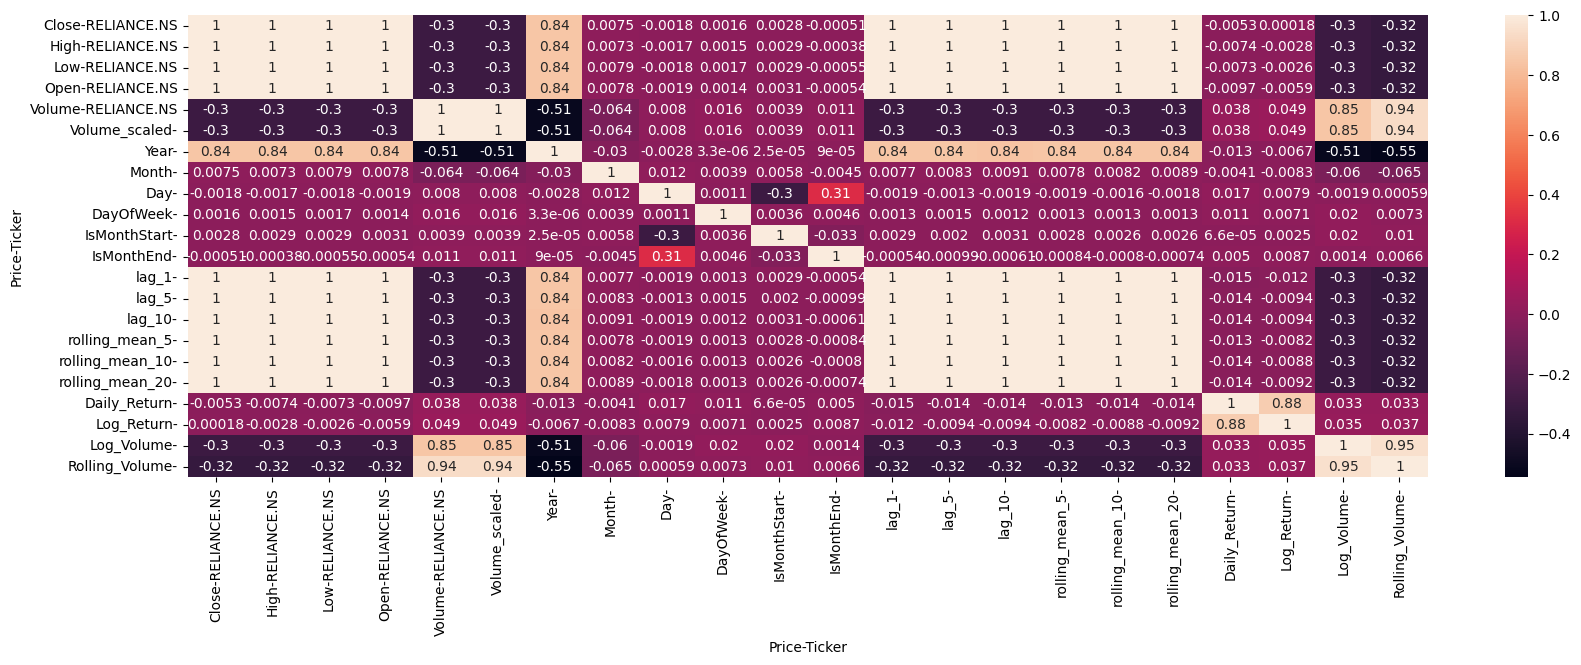

In [11]:

plt.figure(figsize=(20, 6))
sns.heatmap(data=df.corr(),annot=True)

In [12]:
df.drop(columns=['lag_5','lag_10','Open','Low','Rolling_Volume','Daily_Return','IsMonthStart','rolling_mean_10','rolling_mean_20'], inplace=True, errors='ignore')   #we are dropping the columns which are higly correlated to avoid overfitting
df.head()

Price,Close,High,Volume,Volume_scaled,Year,Month,Day,DayOfWeek,IsMonthEnd,lag_1,rolling_mean_5,Log_Return,Log_Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,,,,,,,,,,
19,3.894530,3.894530,0,-0.580937,1996,1,26,4,0,3.894530,4.092171,0.000000,3.608558e+08
20,4.201127,4.237868,652902286,5.828741,1996,1,29,0,0,3.894530,4.053150,0.075780,0.000000e+00
21,4.578671,4.788981,1061936020,9.844311,1996,1,30,1,0,4.201127,4.126885,0.086056,6.529023e+08
22,4.478583,4.706630,731560842,6.600949,1996,1,31,2,1,4.578671,4.209488,-0.022102,1.061936e+09
23,4.658487,4.687627,640422958,5.706229,1996,2,1,3,0,4.478583,4.362280,0.039384,7.315608e+08


<Axes: xlabel='Price-Ticker', ylabel='Price-Ticker'>

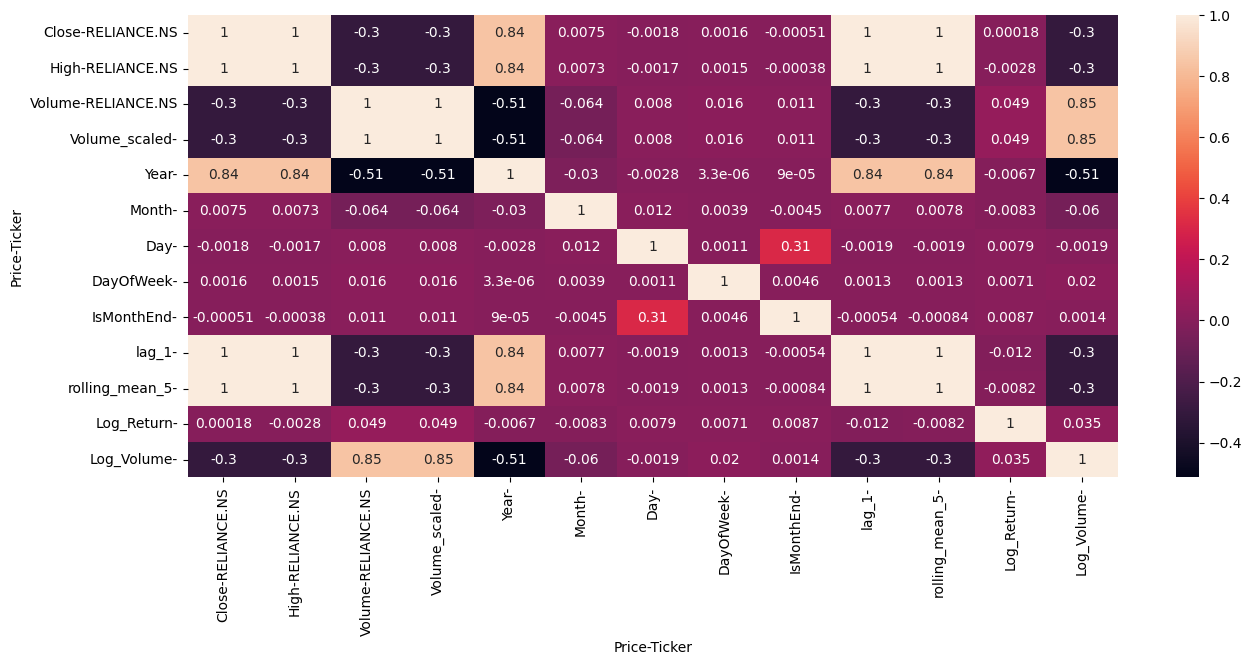

In [13]:
plt.figure(figsize=(15, 6))
sns.heatmap(data=df.corr(),annot=True)

In [14]:
from sklearn.preprocessing import StandardScaler

import seaborn as sns
scaler = StandardScaler()
df[['High', 'Close', 'Volume', 'lag_1', 'rolling_mean_5', 'Log_Return']] = scaler.fit_transform(df[['High', 'Close', 'Volume', 'lag_1', 'rolling_mean_5', 'Log_Return']])
df.head()



Price,Close,High,Volume,Volume_scaled,Year,Month,Day,DayOfWeek,IsMonthEnd,lag_1,rolling_mean_5,Log_Return,Log_Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,,,,,,,,,,
19,-0.797292,-0.798890,-0.578703,-0.580937,1996,1,26,4,0,-0.797134,-0.796633,-0.022929,3.608558e+08
20,-0.796537,-0.798053,5.868725,5.828741,1996,1,29,0,0,-0.797134,-0.796729,2.171197,0.000000e+00
21,-0.795607,-0.796709,9.907945,9.844311,1996,1,30,1,0,-0.796379,-0.796548,2.468741,6.529023e+08
22,-0.795853,-0.796910,6.645481,6.600949,1996,1,31,2,1,-0.795449,-0.796344,-0.662871,1.061936e+09
23,-0.795410,-0.796956,5.745491,5.706229,1996,2,1,3,0,-0.795695,-0.795967,1.117397,7.315608e+08


In [15]:
df["Close"].describe()

Ticker,RELIANCE.NS
count,7339.000000
mean,0.000000
std,1.000068
min,-0.797292
25%,-0.753262
50%,-0.330313
75%,0.203319
max,3.122488


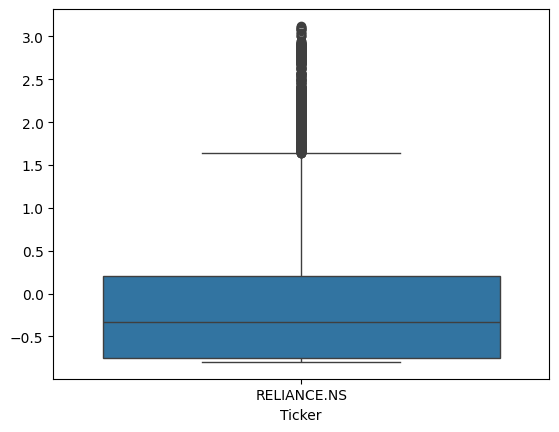

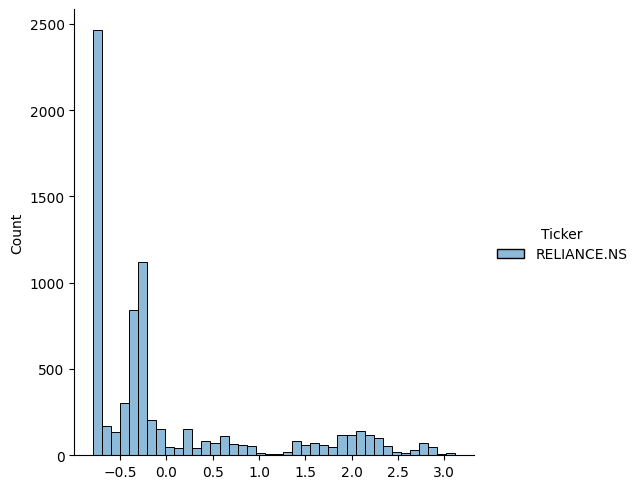

In [16]:
sns.boxplot(df['Close'])                              #Checking for outliers cause for stock market outliers indicate trend breakers
sns.displot(df['Close'])
plt.show()

In [17]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- 1. Prepare Data ---

# Define X and y
X = df.drop(['Close'], axis=1)  # Drop target
y = df['Close']

# Sort the data by date (Ensure your data is sorted by date/time)
df = df.sort_index()  # Assuming your dataframe is indexed by date

# Split into train and test (chronologically)
train_size = int(len(df) * 0.8)  # 80% training data
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- 2. Define Models ---

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

# --- 3. Train and Evaluate ---

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'MAE': mae,
        'RMSE': rmse,
        'R² Score': r2
    }

# --- 4. Display Results ---
results_df = pd.DataFrame(results).T
print(results_df)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


                        MAE      RMSE  R² Score
Linear Regression  0.020338  0.026314  0.998352
Ridge Regression   0.020714  0.027234  0.998234
Lasso Regression   0.679535  0.707732 -0.192407
Random Forest      1.076554  1.239737 -2.658866
Decision Tree      1.075979  1.238652 -2.652463
Gradient Boosting  1.076142  1.239635 -2.658263
XGBoost            1.099962  1.260493 -2.782407


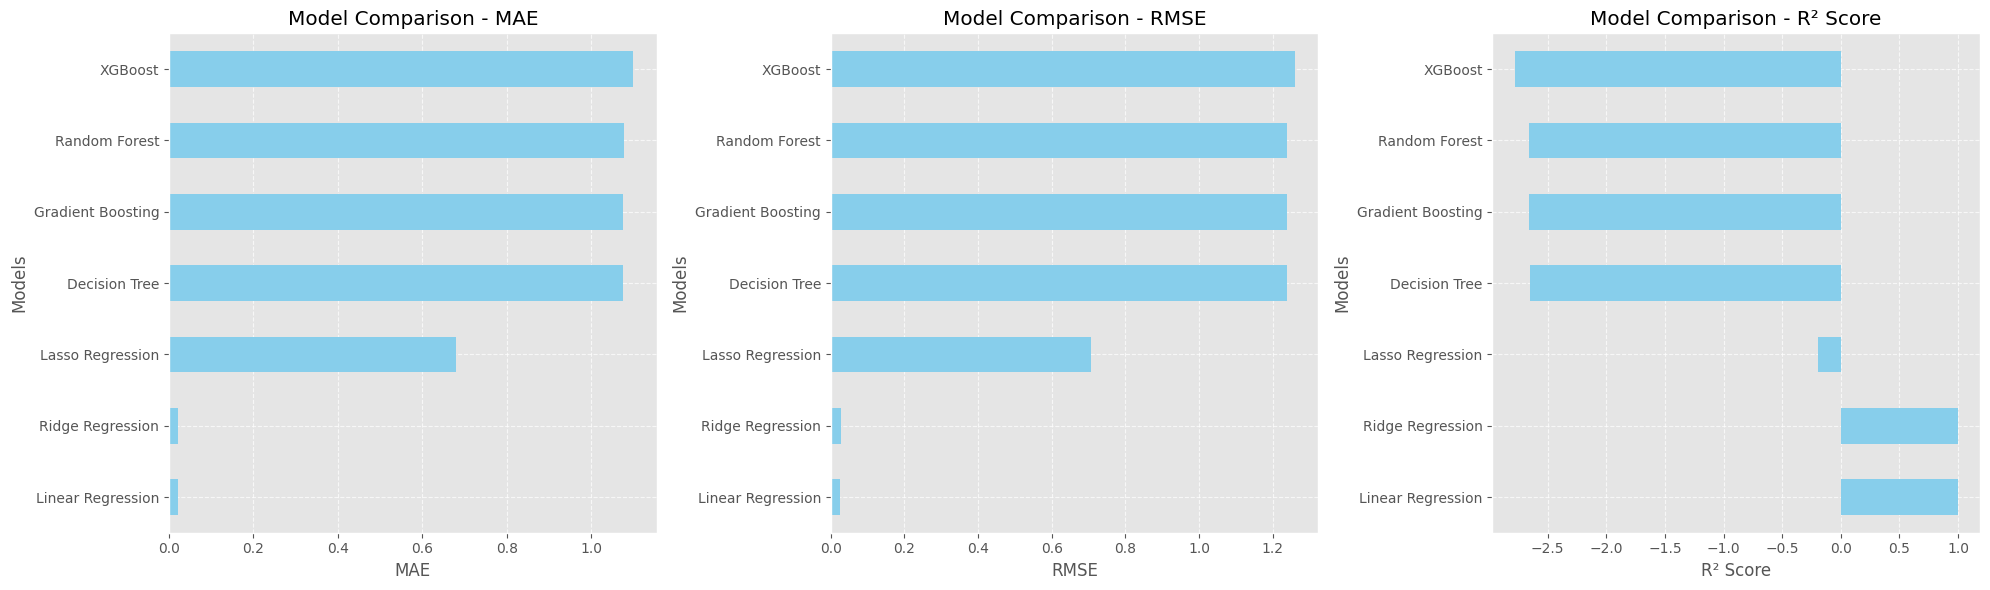

In [18]:
import matplotlib.pyplot as plt

# Use a default style
plt.style.use('ggplot')  # or 'default', 'bmh', etc.

# Metrics you want to plot
metrics = ['MAE', 'RMSE', 'R² Score']

# Create a figure with 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # Width=20, Height=6

# Loop through each metric and corresponding axis
for idx, metric in enumerate(metrics):
    ax = axes[idx]
    sorted_data = results_df[metric].sort_values(ascending=True if metric != 'R² Score' else False)
    sorted_data.plot(kind='barh', ax=ax, color='skyblue')
    ax.set_title(f'Model Comparison - {metric}')
    ax.set_xlabel(metric)
    ax.set_ylabel('Models')
    ax.grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()




# From the above plot we infer that Ridge and Linear Regression are the best fit

In [19]:
today_features=df.drop(['Close'], axis=1).iloc[-1:]
today_features_scaled = scaler.transform(today_features)
best_model_name = results_df['R² Score'].idxmax()
best_model = models[best_model_name]

# 4. Predict
today_prediction = best_model.predict(today_features_scaled)

predicted_close = today_prediction.flatten()[0]
print(f"Predicted Close value for today using {best_model_name}: {predicted_close:.2f}")


Predicted Close value for today using Linear Regression: 2.37


In [20]:
# Extract scalar value properly
actual_close = df['Close'].iloc[-1].item()  # <- .item() converts to float

# Predicted close (already done earlier)
predicted_close = today_prediction.flatten()[0]

# Calculate percentage accuracy
accuracy = (1 - abs(actual_close - predicted_close) / actual_close) * 100

print(f"Actual Close: {actual_close:.2f}")
print(f"Predicted Close: {predicted_close:.2f}")
print(f"Prediction Accuracy: {accuracy:.2f}%")


Actual Close: 2.40
Predicted Close: 2.37
Prediction Accuracy: 98.82%


In [21]:
df.head()

Price,Close,High,Volume,Volume_scaled,Year,Month,Day,DayOfWeek,IsMonthEnd,lag_1,rolling_mean_5,Log_Return,Log_Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,,,,,,,,,,
19,-0.797292,-0.798890,-0.578703,-0.580937,1996,1,26,4,0,-0.797134,-0.796633,-0.022929,3.608558e+08
20,-0.796537,-0.798053,5.868725,5.828741,1996,1,29,0,0,-0.797134,-0.796729,2.171197,0.000000e+00
21,-0.795607,-0.796709,9.907945,9.844311,1996,1,30,1,0,-0.796379,-0.796548,2.468741,6.529023e+08
22,-0.795853,-0.796910,6.645481,6.600949,1996,1,31,2,1,-0.795449,-0.796344,-0.662871,1.061936e+09
23,-0.795410,-0.796956,5.745491,5.706229,1996,2,1,3,0,-0.795695,-0.795967,1.117397,7.315608e+08


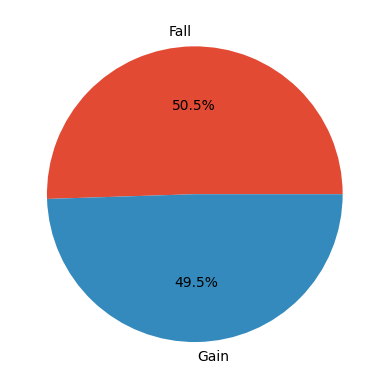

In [22]:
df['Gain/Fall'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
df.tail()

plt.pie(df['Gain/Fall'].value_counts().values,
        labels=["Fall", "Gain"], autopct='%1.1f%%')
plt.show()

# Step 1: Features and Target for classification
X_cls = df.drop(['Close', 'Gain/Fall'], axis=1)  # Use all features except Close and Gain/Fall
y_cls = df['Gain/Fall']                          # Target is Gain/Fall

# Train-Test Split
train_size_cls = int(len(df) * 0.8)
X_train_cls, X_test_cls = X_cls.iloc[:train_size_cls], X_cls.iloc[train_size_cls:]
y_train_cls, y_test_cls = y_cls.iloc[:train_size_cls], y_cls.iloc[train_size_cls:]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier(),
  RandomForestClassifier(n_estimators=100, random_state=42),
  DecisionTreeClassifier(random_state=42),
  KNeighborsClassifier(n_neighbors=5),
  GradientBoostingClassifier(n_estimators=100, random_state=42)]

for i in range(7):
  models[i].fit(X_train_cls, y_train_cls)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    y_train_cls, models[i].predict_proba(X_train_cls)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    y_test_cls, models[i].predict_proba(X_test_cls)[:,1]))
  print()



LogisticRegression() : 
Training Accuracy :  0.5048077335948334
Validation Accuracy :  0.489466340410273



In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create a grid of subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 2 rows and 4 columns (since you have 7 models, some axes will be empty)
axes = axes.ravel()  # Flatten the 2D array of axes for easy iteration

# Loop through all models and plot the confusion matrix for each
for i, model in enumerate(models):
    # Get the predicted classes
    y_pred = model.predict(X_test_cls)

    # Plot the confusion matrix on the corresponding subplot
    ConfusionMatrixDisplay.from_estimator(
        model, X_test_cls, y_test_cls, ax=axes[i], cmap='Blues', display_labels=model.classes_)

    axes[i].set_title(f'{model.__class__.__name__}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')
    axes[i].grid(False)

# Adjust layout for better readability
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Create a figure for a single plot
plt.figure(figsize=(8, 6))

# Loop through all models and plot the ROC curve for each
for model in models:
    # Get predicted probabilities (not just 0/1 predictions)
    y_probs = model.predict_proba(X_test_cls)[:, 1]  # Probabilities for class 1

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test_cls, y_probs)
    auc_score = roc_auc_score(y_test_cls, y_probs)

    # Plot ROC curve on the same plot
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {auc_score:.3f})')

# Plot random chance diagonal (AUC = 0.5)
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance (AUC = 0.5)")

# Add labels and title
plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Add legend
plt.legend(loc='lower right')

# Add grid
plt.grid(True, alpha=0.3)

# Show the plot
plt.show()

